In [53]:
# set up and import libraries
import scipy
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
%matplotlib inline
dot = np.dot
randn = np.random.randn
norm = np.linalg.norm
exp = np.exp
binom = np.random.binomial
ln = np.log
choose = np.random.choice

In [54]:
X = []
y = []
trdata = pd.read_csv('mnist_train.csv', sep=',', engine='python')
tstdata = pd.read_csv('mnist_test.csv', sep=',', engine='python')

X = trdata.as_matrix()
X = X.astype(np.float)
y = X[:,0]
X = X[:,1:]
print(X.shape, y.shape)

Xt = tstdata.as_matrix()
Xt = Xt.astype(np.float)
yt = Xt[:,0]
Xt = Xt[:,1:]
print(Xt.shape, yt.shape)

(59999, 784) (59999,)
(9999, 784) (9999,)


# Normalize X

In [55]:
rownorms = np.linalg.norm(X,axis=1)
X = X / rownorms[:, np.newaxis]

rownorms = np.linalg.norm(Xt,axis=1)
Xt = Xt / rownorms[:, np.newaxis]

# Convert y to One-Hot Encoding

In [56]:
def numtovec(digit):
    vec = np.zeros(10)
    vec[digit] = 1
    return np.array(vec)

def onehot(ydig):
    ynew = np.zeros((ydig.shape[0], 10))
    for i in range(ydig.shape[0]):
        ynew[i] = numtovec(ydig[i])
    return ynew

y = onehot(y)
yt = onehot(yt)

/home/nate/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


## The shape of weights is:
$$ \begin{bmatrix}
\\-\theta_1-
\\ -\theta_2-
\\ \vdots
\\ -\theta_H-
\end{bmatrix}
$$
Where $H=\text{number of classes}$ and $\theta$ has dimension $dim$

In [57]:
# introduce softmax function
def normalize(weights, xVec):
    return sum(exp(dot(weights, xVec)))

def smax(weights, xVec):
    return exp(dot(weights, xVec) / ln(normalize(weights, xVec)))

def predict(weights, x):
    return np.array(list(map(lambda xVec: smax(weights, xVec), x)))

def genClass(probVec):
    out = np.zeros(probVec.shape[0])
    out[choose(classes, p = probVec)] = 1
    return out

In [58]:
# introduce cost function
def cost(weights, x ,y):
    cost = 0
    for xVec, yVec in zip(x,y):
        for j in range(weights.shape[0]):
            if yVec[j] == 1:
                cost -= dot(weights[j],xVec) - ln(normalize(weights, xVec))
    if cost == np.inf:
        return sys.float_info.max
    return cost

In [59]:
# introduce gradient function
def gradient(weights, x, y, batchSize, reg = 0):
    grad = np.zeros(weights.shape)
    for j in range(weights.shape[0]):
        usedIndices = np.random.randint(x.shape[0], size = batchSize)
        for xVec,yVec in zip(x[usedIndices,:], y[usedIndices,:]):
            grad[j] -= xVec * (yVec[j] - smax(weights, xVec)[j])
    return (grad + reg * weights) / x.shape[0]

In [60]:
# gradient descent
def gradDescent(x, y, learningRate, numits, batchSize, reg = 0):
    weights = randn(y.shape[1], x.shape[1])
    for i in range(numits):
        grad = gradient(weights, x, y, batchSize, reg)
        weights -= learningRate * grad
    return weights

In [61]:
smallX = X[:,0:1000]
smally = y[:,0:1000]


def correctPercent(weights, x, y):
    correct = 0
    predictions = predict(weights,x)
    for xVec,yVec in zip(predictions,y):
        if np.where(xVec==max(xVec)) == np.where(yVec == 1):
            correct += 1
    return correct*100.0/x.shape[0]

accs = []
regs = np.linspace(0,100,10)
%timeit
for reg in regs:
    weights = gradDescent(smallX, smally, 100, 1, 10, reg) # x, y, learningRate, numits, batchSize, reg
    accs += [correctPercent(weights,Xt,yt)]
    
print('Done')

Done


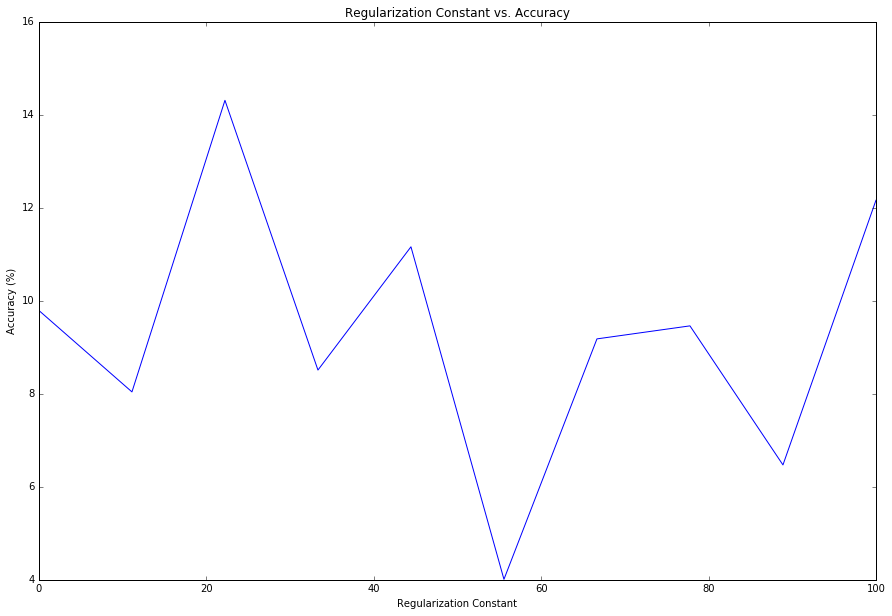

In [62]:
plt.figure(figsize = (15,10))
plt.plot(regs,accs)
plt.title("Regularization Constant vs. Accuracy")
plt.xlabel("Regularization Constant")
plt.ylabel("Accuracy (%)")